# **Exploratory Data Analysis**


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


Plot the histogram for the column `ConvertedComp`.


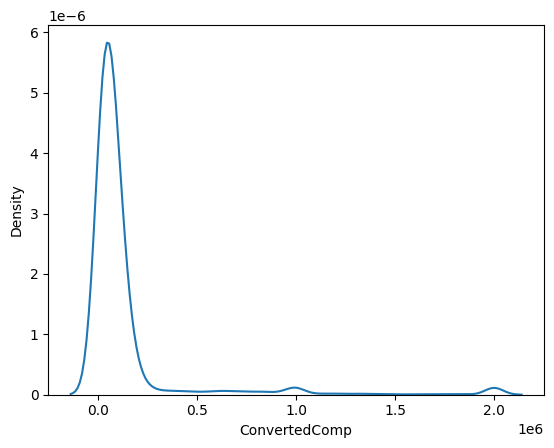

In [3]:
sns.kdeplot(df['ConvertedComp'], label='ConvertedComp')

plt.show()

What is the median of the column `ConvertedComp`?


<AxesSubplot: ylabel='Frequency'>

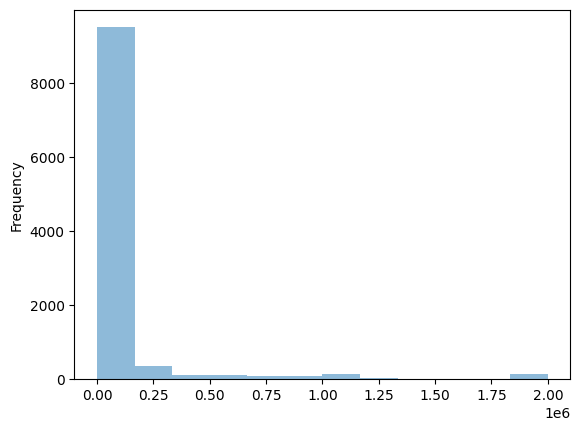

In [4]:
df['ConvertedComp'].plot.hist(bins=12, alpha=0.5)

How many responders identified themselves only as a **Man**?


In [5]:
print('median ConvertedComp is',df['ConvertedComp'].median())
print('median Age is',df['Age'].median())

median ConvertedComp is 57745.0
median Age is 29.0


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [6]:
print('\n\nThere are', df['Gender'].nunique(), 'unique Gender values in the survey:')

print('\nGender        value count')      
print('------        -----------')
print(df['Gender'].value_counts())

print('\n', df['Gender'].eq('Man').sum(), 'respondents identify as "Man"')



There are 7 unique Gender values in the survey:

Gender        value count
------        -----------
Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

 10480 respondents identify as "Man"


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [7]:
df['ConvertedComp'].median()
print('The median ConvertedComp of responders identified themselves only as a Woman is', df[df['Gender'].eq('Woman')]['ConvertedComp'].median())

The median ConvertedComp of responders identified themselves only as a Woman is 57708.0


Plot a histogram of the column `Age`.


In [8]:
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

<AxesSubplot: ylabel='Frequency'>

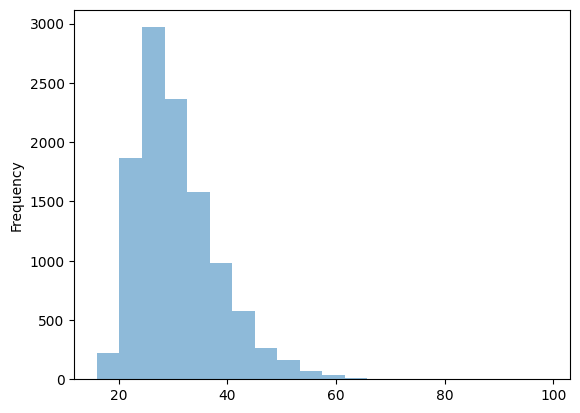

In [9]:
df['Age'].plot.hist(bins=20, alpha=0.5)

## Outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot: xlabel='ConvertedComp'>

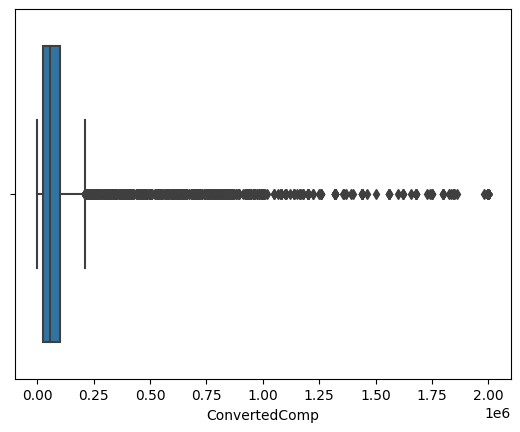

In [10]:
sns.boxplot(x=df["ConvertedComp"])

Find out the Inter Quartile Range for the column `ConvertedComp`.


<AxesSubplot: xlabel='Age'>

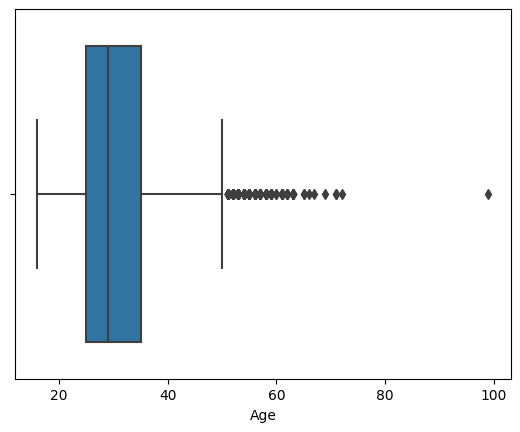

In [11]:
sns.boxplot(x=df["Age"])

Find out the upper and lower bounds.


In [12]:
df['ConvertedComp'].describe()

Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print('The middle quartiles for ConvertedComp range from',Q1, 'to',Q3,'. The interquartile range is',IQR)

The middle quartiles for ConvertedComp range from 26868.0 to 100000.0 . The interquartile range is 73132.0


Identify how many outliers are there in the `ConvertedComp` column.


In [13]:
min_val = df['ConvertedComp'].min()
max_val = df['ConvertedComp'].max()
print('The min/max for ConvertedComp are',min_val, 'and', max_val)

The min/max for ConvertedComp are 0.0 and 2000000.0


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [14]:
print('Outliers below:',df['ConvertedComp'].lt(Q1 - 1.5*IQR).sum())
print('Outliers above:',df['ConvertedComp'].gt(Q3 + 1.5*IQR).sum())
print('Outliers below:',df['ConvertedComp'].lt(Q1 - 1.5*IQR).sum())
print('Median with outliers:',df['ConvertedComp'].median())
print('Median with outliers removed:',df[df['ConvertedComp'].le(Q3 + 1.5*IQR)]['ConvertedComp'].median())
print('Mean with outliers removed:',df[df['ConvertedComp'].le(Q3 + 1.5*IQR)]['ConvertedComp'].mean())


Outliers below: 0
Outliers above: 879
Outliers below: 0
Median with outliers: 57745.0
Median with outliers removed: 52704.0
Mean with outliers removed: 59883.20838915799


In [15]:
print(df.shape)
print(df['ConvertedComp'].gt(Q3 + 1.5*IQR).shape)
df1 = df[df['ConvertedComp'].le(Q3 + 1.5*IQR)]
print('total number in new dataset:',df1.shape[0])
df2 = df[df['ConvertedComp'].gt(Q3 + 1.5*IQR)]
print('total number of outliers removed:',df2.shape[0])
df3 = df[df['ConvertedComp'].isnull()]
print('total number of nulls removed:',df3.shape[0])
print('total of outliers + inliers + nulls:', (df1.shape[0] + df2.shape[0] + df3.shape[0]))


(11398, 85)
(11398,)
total number in new dataset: 9703
total number of outliers removed: 879
total number of nulls removed: 816
total of outliers + inliers + nulls: 11398


## Correlation


In [16]:
df.select_dtypes(include=[np.number]).corr()['Age']



Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64